In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows=20

In [3]:
names1880= pd.read_csv('babynames\yob1880.txt')
names1880.head(5) # raw dataframe

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


In [4]:
names=['name','sex','births'] # given columnname for the dataframe
names1880.columns=names
names1880.head()

,name,sex,births
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


In [5]:
names1880.groupby('sex').births.sum()

sex
F     83929
M    110490
Name: births, dtype: int64

In [6]:

years= range(1880,2018)
pieces =[] 
columns= names #column name

for year in years:
    path='babynames\yob%d.txt' % year
    frame= pd.read_csv(path,names=columns)
    
    frame['year']= year
    pieces.append(frame)
    
# concatenate everything into single dataframe
names= pd.concat(pieces,ignore_index=True)

names.head(5)


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
names.shape # size of data frame

(1925013, 4)

In [8]:
total_births= names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births.tail(5)

sex,F,M
year,,
2013,1751320,1888009
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837


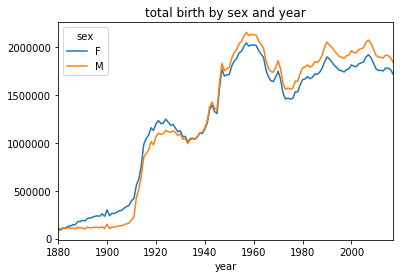

In [9]:
# visualizing number of births per year gender wise 
total_births.plot(title='total birth by sex and year')

In [10]:
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group

names=names.groupby(['year','sex']).apply(add_prop)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [11]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
            ... 
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
      M      1.0
Name: prop, Length: 276, dtype: float64

In [15]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
#drop the group index,not needed
top1000.reset_index(inplace=True,drop=True)

top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [17]:
#analyzing naming rends
#spliting dataset into top 1000 names for boys & girls 
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [19]:
total_births= top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7135 entries, Aaden to Zyaire
dtypes: float64(7135)
memory usage: 7.5 MB


In [46]:
subset=total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6F04804A8>,
      dtype=object)

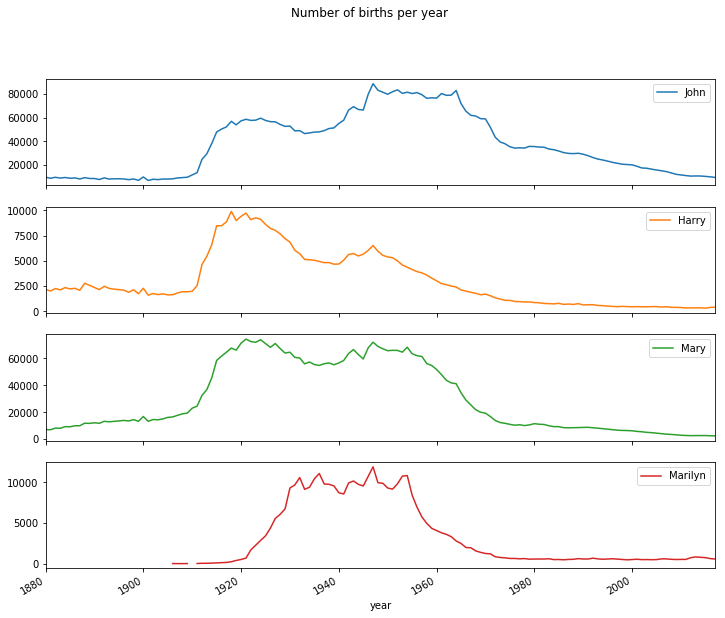

In [48]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

In [49]:
table= top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

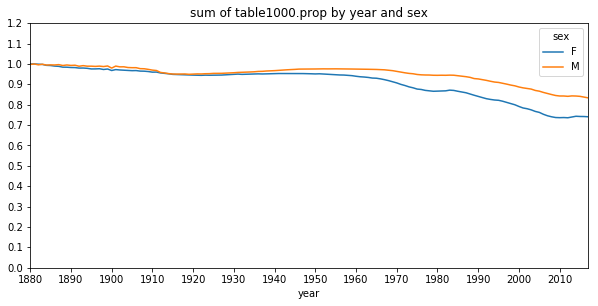

In [71]:
# proportion of births for top 1000 names by sex

table.plot(title='sum of table1000.prop by year and sex', yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10),figsize=(10,4.5))

In [80]:
df=boys[boys.year==2017]
df.head(5)

,name,sex,births,year,prop
274877,Liam,M,18798,2017,0.010201
274878,Noah,M,18410,2017,0.009990
274879,William,M,14967,2017,0.008122
274880,James,M,14291,2017,0.007755
274881,Logan,M,14014,2017,0.007605


In [84]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

274877    0.010201
274878    0.020191
274879    0.028312
274880    0.036067
274881    0.043672
274882    0.051159
274883    0.058511
274884    0.065752
274885    0.072911
274886    0.080062
Name: prop, dtype: float64

In [85]:
prop_cumsum.values.searchsorted(0.5)

142

In [86]:
df=boys[boys.year==1900]

In [87]:
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum()

In [88]:
in1900.values.searchsorted(0.5)+1

25

In [97]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1


diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


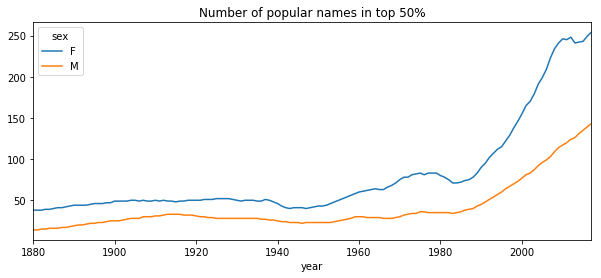

In [104]:
# Plot of diversity metric by year
diversity.plot(title='Number of popular names in top 50%',figsize=(10,4))